In [1]:
import json
import pandas
import os
from glob import glob
from tqdm.autonotebook import tqdm
import pandas as pd

/tmp/ipykernel_77006/2482589444.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
jsons = glob("../gomez/seqfiles_linkbert_810_5/*/seq.json")

In [3]:
data = []
for json_file in tqdm(jsons, desc="Processing JSON files"):
    folder_name = os.path.basename(os.path.dirname(json_file))
    try:
        with open(json_file) as f:
            json_data = json.load(f)
            p_value = json_data["test results"]["p-value"]
            data.append({'name': folder_name, 'p_value': p_value})
    except json.JSONDecodeError:
        continue

df = pd.DataFrame(data)


Processing JSON files:   0%|          | 0/2243 [00:00<?, ?it/s]

In [4]:
df["category"] = df.name.str.split("_",n=1,expand=True)[0]

In [5]:
ratio = df.groupby("category").apply(lambda x: x[x["p_value"] < 0.05].shape[0] / x[x["p_value"] > 0.00].shape[0])
print(ratio)


category
first    0.233533
last     0.322687
dtype: float64


/tmp/ipykernel_77006/3948675091.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratio = df.groupby("category").apply(lambda x: x[x["p_value"] < 0.05].shape[0] / x[x["p_value"] > 0.00].shape[0])


In [6]:
df.category.value_counts()

category
first    1239
last      996
Name: count, dtype: int64

array([<Axes: title={'center': 'first'}>,
       <Axes: title={'center': 'last'}>], dtype=object)

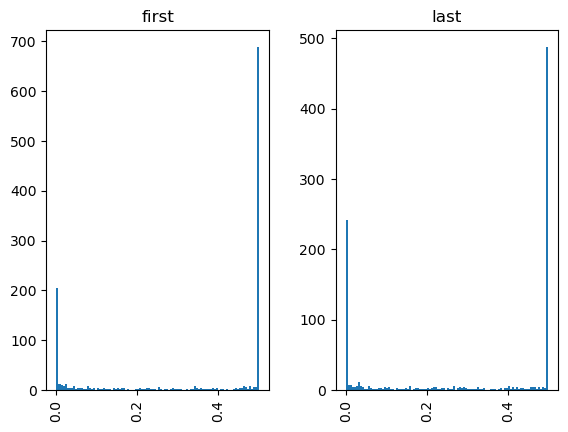

In [7]:
df.hist(column='p_value', by='category', bins=100)
